In [1]:
import sys
sys.path.insert(0, '../tools')

%load_ext prov_magics
import provn
import prov_dictionary

@provn.graph.prov("hadMember")
def had_member(dot, ecollection=None, eid=None, attrs=None, id_=None):
    return provn._arrow2(dot, ecollection, eid, "[ ]")


# Plain PROV

## Names, literals, and constants

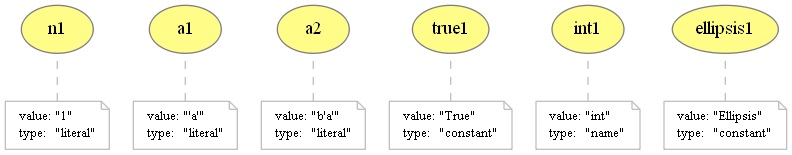

In [2]:
%%provn -o ../plain_prov/names -e png svg pdf provn
entity(n1, [value="1", type="literal"])
entity(a1, [value="'a'", type="literal"])
entity(a2, [value="b'a'", type="literal"])
entity(true1, [prov:value="True", type="constant"])
entity(int1, [prov:value="int", type="name"])
entity(ellipsis1, [prov:value="Ellipsis", type="constant"])

## Assignment

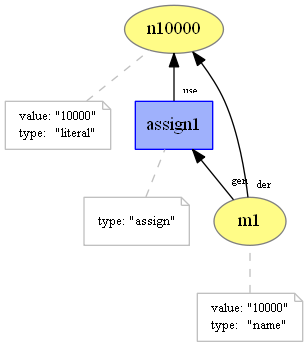

In [3]:
%%provn -o ../plain_prov/assign -e png svg pdf provn
entity(n10000, [value="10000", type="literal"])
entity(m1, [value="10000", type="name"])

activity(assign1, [type="assign"])
used(u1; assign1, n10000, -)
wasGeneratedBy(g1; m1, assign1, -)
wasDerivedFrom(m1, n10000, assign1, g1, u1)

## Operation

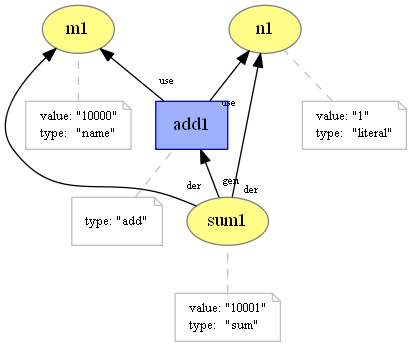

In [4]:
%%provn -o ../plain_prov/operation -e png svg pdf provn
entity(m1, [value="10000", type="name"])
entity(n1, [value="1", type="literal"])
entity(sum1, [value="10001", type="sum"])

activity(add1, [type="add"])
used(u2; add1, m1, -)
used(u3; add1, n1, -)
wasGeneratedBy(g2; sum1, add1, -)
wasDerivedFrom(sum1, m1, add1, g2, u2)
wasDerivedFrom(sum1, n1, add1, g3, u3)

## List definition

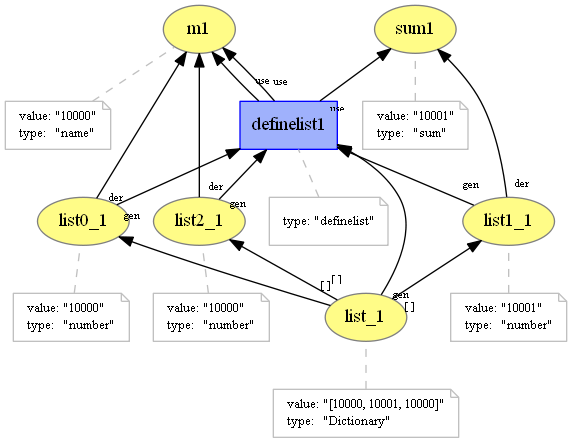

In [5]:
%%provn -o ../plain_prov/list -e png svg pdf provn
entity(m1, [value="10000", type="name"])
entity(sum1, [value="10001", type="sum"])

entity(list_1, [value="[10000, 10001, 10000]", type="Dictionary"])
entity(list0_1, [value="10000", type="number"])
entity(list1_1, [value="10001", type="number"])
entity(list2_1, [value="10000", type="number"])

hadMember(list_1, list0_1)
hadMember(list_1, list1_1)
hadMember(list_1, list2_1)

activity(definelist1, [type="definelist"])
used(u4; definelist1, m1, -)
wasGeneratedBy(g4; list0_1, definelist1, -)
wasDerivedFrom(list0_1, m1, definelist1, g4, u4)
used(u5; definelist1, sum1, -)
wasGeneratedBy(g5; list1_1, definelist1, -)
wasDerivedFrom(list1_1, sum1, definelist1, g5, u5)
used(u6; definelist1, m1, -)
wasGeneratedBy(g6; list2_1, definelist1, -)
wasDerivedFrom(list2_1, m1, definelist1, g6, u6)
wasGeneratedBy(list_1, definelist1, -)

## Assignment of list definition

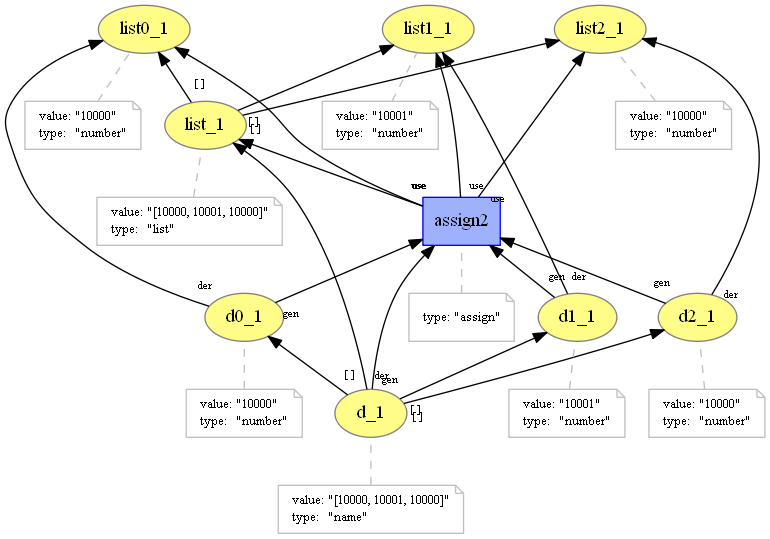

In [6]:
%%provn -o ../plain_prov/list_assign -e png svg pdf provn
// old entities from previous figure
entity(list_1, [value="[10000, 10001, 10000]", type="list"])
entity(list0_1, [value="10000", type="number"])
entity(list1_1, [value="10001", type="number"])
entity(list2_1, [value="10000", type="number"])

hadMember(list_1, list0_1)
hadMember(list_1, list1_1)
hadMember(list_1, list2_1)

// new entities
entity(d_1, [value="[10000, 10001, 10000]", type="name"])
entity(d0_1, [value="10000", type="number"])
entity(d1_1, [value="10001", type="number"])
entity(d2_1, [value="10000", type="number"])

hadMember(d_1, d0_1)
hadMember(d_1, d1_1)
hadMember(d_1, d2_1)


activity(assign2, [type="assign"])
used(u7; assign2, list_1, -)
wasGeneratedBy(g7; d_1, assign2, -)
wasDerivedFrom(d_1, list_1, assign2, g7, u7)
used(u8; assign2, list0_1, -)
wasGeneratedBy(g8; d0_1, assign2, -)
wasDerivedFrom(d0_1, list0_1, assign2, g8, u8)
used(u9; assign2, list1_1, -)
wasGeneratedBy(g9; d1_1, assign2, -)
wasDerivedFrom(d1_1, list1_1, assign2, g9, u9)
used(u10; assign2, list2_1, -)
wasGeneratedBy(g10; d2_1, assign2, -)
wasDerivedFrom(d2_1, list2_1, assign2, g10, u10)

In [7]:
%%provn -o ../plain_prov/list_assign2 -e png svg pdf provn
// old entities from previous figure
entity(d_1, [value="[10000, 10001, 10000]", type="name"])
entity(d0_1, [value="10000", type="number"])
entity(d1_1, [value="10001", type="number"])
entity(d2_1, [value="10000", type="number"])

hadMember(d_1, d0_1)
hadMember(d_1, d1_1)
hadMember(d_1, d2_1)

// new entities
entity(x_1, [value="[10000, 10001, 10000]", type="name"])
entity(x0_1, [value="10000", type="number"])
entity(x1_1, [value="10001", type="number"])
entity(x2_1, [value="10000", type="number"])

hadMember(x_1, x0_1)
hadMember(x_1, x1_1)
hadMember(x_1, x2_1)

activity(assign3, [type="assign"])
used(u11; assign3, d_1, -)
wasGeneratedBy(g11; x_1, assign3, -)
wasDerivedFrom(x_1, d_1, assign3, g11, u11)
used(u12; assign3, d0_1, -)
wasGeneratedBy(g12; x0_1, assign3, -)
wasDerivedFrom(x0_1, d0_1, assign3, g12, u12)
used(u13; assign3, d1_1, -)
wasGeneratedBy(g12; x1_1, assign3, -)##
wasDerivedFrom(x1_1, d1_1, assign3, g13, u13)
used(u14; assign3, d2_1, -)
wasGeneratedBy(g14; x2_1, assign3, -)
wasDerivedFrom(x2_1, d2_1, assign3, g14, u14)

UnexpectedInput: No token defined for: '#' in '##\nwa' at line 31 col 37

## Function call

In [ ]:
%%provn -o ../plain_prov/call -e png svg pdf provn
entity(d_1, [value="[10000, 10001, 10000]", type="name"])
entity(len_d1, [value="3", type="eval"])

activity(len1, [type="len"])
used(len1, d_1, -)
wasGeneratedBy(len_d1, len1, -)

## Access to part of structure

In [ ]:
%%provn -o ../plain_prov/access -e png svg pdf provn
//previous
entity(d_1, [value="[10000, 10001, 10000]", type="name"])
entity(d0_1, [value="10000", type="number"])
entity(d1_1, [value="10001", type="number"])
entity(d2_1, [value="10000", type="number"])

hadMember(d_1, d0_1)
hadMember(d_1, d1_1)
hadMember(d_1, d2_1)


//access
entity(n0, [value="0", type="literal"])
entity(d_ac0_1, [value="10000", type="access"])

activity(access1, [type="access"])
used(access1, d_1, -)
used(access1, n0, -)
used(u15; access1, d0_1, -)
wasGeneratedBy(g15; d_ac0_1, access1, -)
wasDerivedFrom(d_ac0_1, d0_1, access1, g15, u15)

## Assignment to part of structure

In [ ]:
%%provn -o ../plain_prov/part_assign -e png svg pdf provn
//previous
entity(d_1, [value="[10000, 10001, 10000]", type="name"])
entity(d0_1, [value="10000", type="number"])
entity(d1_1, [value="10001", type="number"])
entity(d2_1, [value="10000", type="number"])

hadMember(d_1, d0_1)
hadMember(d_1, d1_1)
hadMember(d_1, d2_1)

entity(x_1, [value="[10000, 10001, 10000]", type="name"])
entity(x0_1, [value="10000", type="number"])
entity(x1_1, [value="10001", type="number"])
entity(x2_1, [value="10000", type="number"])

hadMember(x_1, x0_1)
hadMember(x_1, x1_1)
hadMember(x_1, x2_1)


//part assign
entity(n1, [value="1", type="literal"])
entity(n3, [value="3", type="literal"])
entity(d1_2, [value="3", type="access"])
entity(x1_2, [value="3", type="access"])

entity(d_2, [value="[10000, 3, 10000]", type="name"])
hadMember(d_2, d0_1)
hadMember(d_2, d1_2)
hadMember(d_2, d2_1)

entity(x_2, [value="[10000, 3, 10000]", type="name"])
hadMember(x_2, x0_1)
hadMember(x_2, x1_2)
hadMember(x_2, x2_1)

activity(assign4, [type="assign"])
used(assign4, d_1, -)
used(assign4, x_1, -)
used(assign4, n1, -)
used(u16; assign4, n3, -)
wasGeneratedBy(d_2, assign4, -)
wasGeneratedBy(x_2, assign4, -)
wasGeneratedBy(g16; d1_2, assign4, -)
wasDerivedFrom(d1_2, n3, assign4, g16, u16)
wasGeneratedBy(g17; x1_2, assign4, -)
wasDerivedFrom(x1_2, n3, assign4, g17, u16)




## Full

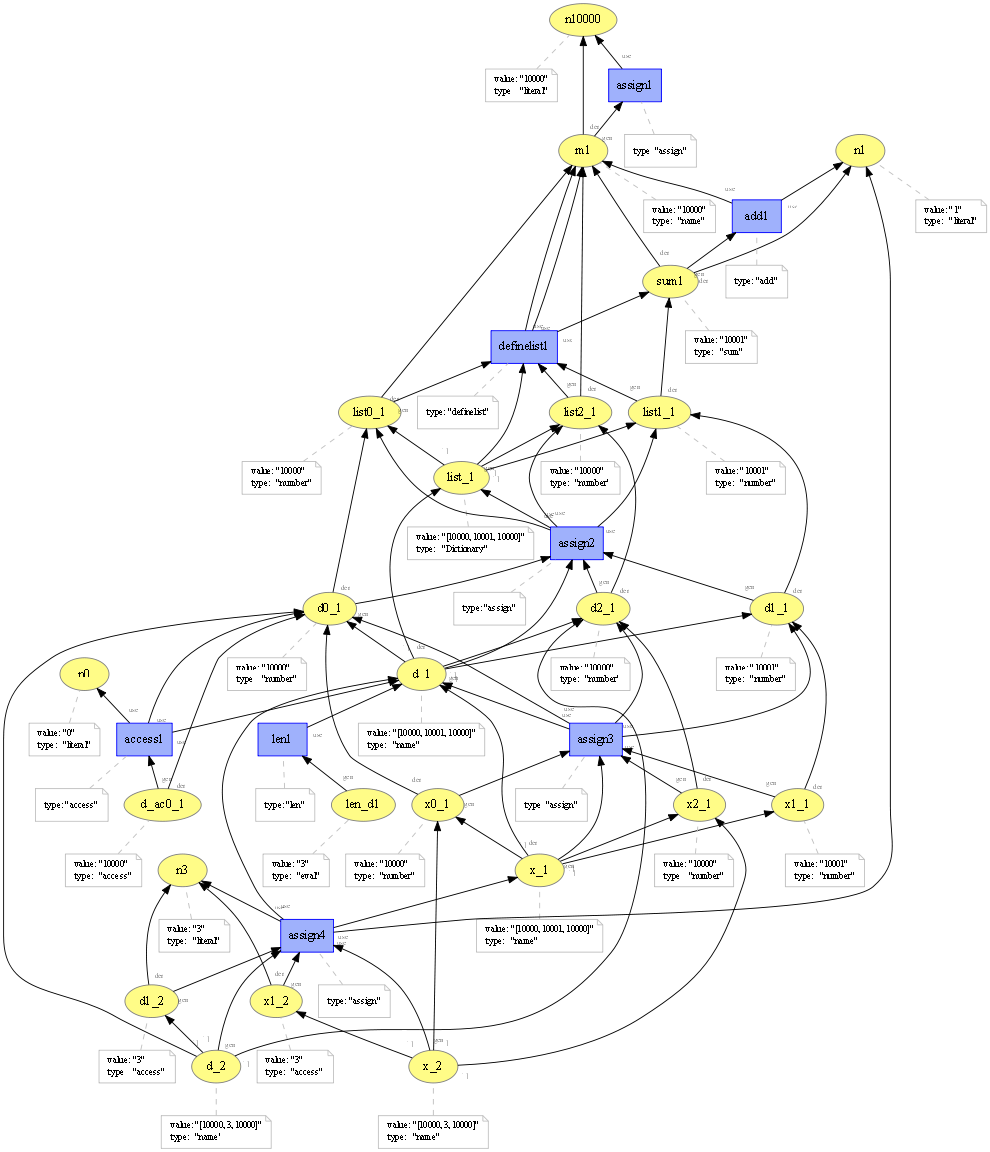

In [9]:
%%provn -o ../plain_prov/full -e png svg pdf provn
// assignment
entity(n10000, [value="10000", type="literal"])
entity(m1, [value="10000", type="name"])

activity(assign1, [type="assign"])
used(u1; assign1, n10000, -)
wasGeneratedBy(g1; m1, assign1, -)
wasDerivedFrom(m1, n10000, assign1, g1, u1)

// operation
entity(n1, [value="1", type="literal"])
entity(sum1, [value="10001", type="sum"])

activity(add1, [type="add"])
used(u2; add1, m1, -)
used(u3; add1, n1, -)
wasGeneratedBy(g2; sum1, add1, -)
wasDerivedFrom(sum1, m1, add1, g2, u2)
wasDerivedFrom(sum1, n1, add1, g3, u3)

// list definition
entity(list_1, [value="[10000, 10001, 10000]", type="Dictionary"])
entity(list0_1, [value="10000", type="number"])
entity(list1_1, [value="10001", type="number"])
entity(list2_1, [value="10000", type="number"])

hadMember(list_1, list0_1)
hadMember(list_1, list1_1)
hadMember(list_1, list2_1)

activity(definelist1, [type="definelist"])
used(u4; definelist1, m1, -)
wasGeneratedBy(g4; list0_1, definelist1, -)
wasDerivedFrom(list0_1, m1, definelist1, g4, u4)
used(u5; definelist1, sum1, -)
wasGeneratedBy(g5; list1_1, definelist1, -)
wasDerivedFrom(list1_1, sum1, definelist1, g5, u5)
used(u6; definelist1, m1, -)
wasGeneratedBy(g6; list2_1, definelist1, -)
wasDerivedFrom(list2_1, m1, definelist1, g6, u6)
wasGeneratedBy(list_1, definelist1, -)

// list assignment
entity(d_1, [value="[10000, 10001, 10000]", type="name"])
entity(d0_1, [value="10000", type="number"])
entity(d1_1, [value="10001", type="number"])
entity(d2_1, [value="10000", type="number"])

hadMember(d_1, d0_1)
hadMember(d_1, d1_1)
hadMember(d_1, d2_1)


activity(assign2, [type="assign"])
used(u7; assign2, list_1, -)
wasGeneratedBy(g7; d_1, assign2, -)
wasDerivedFrom(d_1, list_1, assign2, g7, u7)
used(u8; assign2, list0_1, -)
wasGeneratedBy(g8; d0_1, assign2, -)
wasDerivedFrom(d0_1, list0_1, assign2, g8, u8)
used(u9; assign2, list1_1, -)
wasGeneratedBy(g9; d1_1, assign2, -)
wasDerivedFrom(d1_1, list1_1, assign2, g9, u9)
used(u10; assign2, list2_1, -)
wasGeneratedBy(g10; d2_1, assign2, -)
wasDerivedFrom(d2_1, list2_1, assign2, g10, u10)

// list assignment 2
entity(x_1, [value="[10000, 10001, 10000]", type="name"])
entity(x0_1, [value="10000", type="number"])
entity(x1_1, [value="10001", type="number"])
entity(x2_1, [value="10000", type="number"])

hadMember(x_1, x0_1)
hadMember(x_1, x1_1)
hadMember(x_1, x2_1)

activity(assign3, [type="assign"])
used(u11; assign3, d_1, -)
wasGeneratedBy(g11; x_1, assign3, -)
wasDerivedFrom(x_1, d_1, assign3, g11, u11)
used(u12; assign3, d0_1, -)
wasGeneratedBy(g12; x0_1, assign3, -)
wasDerivedFrom(x0_1, d0_1, assign3, g12, u12)
used(u13; assign3, d1_1, -)
wasGeneratedBy(g12; x1_1, assign3, -)
wasDerivedFrom(x1_1, d1_1, assign3, g13, u13)
used(u14; assign3, d2_1, -)
wasGeneratedBy(g14; x2_1, assign3, -)
wasDerivedFrom(x2_1, d2_1, assign3, g14, u14)

// call
entity(len_d1, [value="3", type="eval"])

activity(len1, [type="len"])
used(len1, d_1, -)
wasGeneratedBy(len_d1, len1, -)

// part access
entity(n0, [value="0", type="literal"])
entity(d_ac0_1, [value="10000", type="access"])

activity(access1, [type="access"])
used(access1, d_1, -)
used(access1, n0, -)
used(u15; access1, d0_1, -)
wasGeneratedBy(g15; d_ac0_1, access1, -)
wasDerivedFrom(d_ac0_1, d0_1, access1, g15, u15)

// part assignment
entity(n3, [value="3", type="literal"])
entity(d1_2, [value="3", type="access"])
entity(x1_2, [value="3", type="access"])

entity(d_2, [value="[10000, 3, 10000]", type="name"])
hadMember(d_2, d0_1)
hadMember(d_2, d1_2)
hadMember(d_2, d2_1)

entity(x_2, [value="[10000, 3, 10000]", type="name"])
hadMember(x_2, x0_1)
hadMember(x_2, x1_2)
hadMember(x_2, x2_1)

activity(assign4, [type="assign"])
used(assign4, d_1, -)
used(assign4, x_1, -)
used(assign4, n1, -)
used(u16; assign4, n3, -)
wasGeneratedBy(d_2, assign4, -)
wasGeneratedBy(x_2, assign4, -)
wasGeneratedBy(g16; d1_2, assign4, -)
wasDerivedFrom(d1_2, n3, assign4, g16, u16)
wasGeneratedBy(g17; x1_2, assign4, -)
wasDerivedFrom(x1_2, n3, assign4, g17, u16)
